# Visualization

The master table generated and designed through our data pipeline can be preliminarily analyzed by visualization. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
path = r'..\data\merged\master.pickle'

In [3]:
df = pd.read_pickle(path)

In [4]:
df.head()

code pilot                                           variable  value  \
0  cki_001   agh   adult_member_cal_//_all_//_demographic_//_number   -0.3   
1  cki_001   agh  adults_own_tazkira_1_3_3_//_all_//_demographic...    0.0   
2  cki_001   agh  average_montly_income_4_1_//_all_//_livelihood...  -0.15   
3  cki_001   agh  average_spenditure_4_4_._agri_and_livestock_//...   -1.0   
4  cki_001   agh  average_spenditure_4_4_._education_//_all_//_l...   -0.7   

                                               check  \
0               hh_db = 3.27 [3.14;3.4] vs ki_db = 2   
1              hh_db = 2.01 [1.93;2.09] vs ki_db = 2   
2  hh_db = 10675.31 [10323.45;11027.17] vs ki_db ...   
3           hh_db = 26.51 [13.16;39.85] vs ki_db = 0   
4        hh_db = 260.81 [226.14;295.49] vs ki_db = 0   

                                      question type_question   QType  \
0                             adult_member_cal        number  number   
1                     adults_own_tazkira_1_3_3        number  number   
2                    average_montly_income_4_1        number  number   
3  average_spenditure_4_4_._agri_and_livestock        number  number   
4           average_spenditure_4_4_._education        number  number   

  question_population question_sector  ... ordinal_perc  \
0                 all     demographic  ...          nan   
1                 all     demographic  ...          nan   
2                 all      livelihood  ...          nan   
3                 all      livelihood  ...          nan   
4                 all      livelihood  ...          nan   

                                                 Key level comment  \
0                                   adult_member_cal   nan     nan   
1                           adults_own_tazkira_1_3_3   nan     nan   
2                                 average_income_4_1   nan     nan   
3  x_4_4_how_much_did_the_following_essentials_._...   nan     nan   
4  x_4_4_how_much_did_the_following_essentials_._...   nan     nan   

                                             Key_bck inwomen  \
0                                   adult_member_cal     nan   
1                           adults_own_tazkira_1_3_3     nan   
2                                 average_income_4_1     nan   
3  x_4_4_how_much_did_the_following_essentials_._...     nan   
4  x_4_4_how_much_did_the_following_essentials_._...     nan   

                              ki_data         indicator polarise  \
0                   2-/-3-/-4-/-6-/-8  household_number  neutral   
1                   2-/-3-/-5-/-6-/-8           tazkira    under   
2  5000-/-7500-/-9000-/-18000-/-20000    monthly_income    under   
3                                   0     income_source  neutral   
4        0-/-500-/-1000-/-1500-/-2000       expenditure    under   

         Unnamed: 20  
0  0.608252427184466  
1  0.436893203883495  
2  0.394660194174757  
3                nan  
4  0.907766990291262  

[5 rows x 33 columns]

In [5]:
df.columns

Index(['code', 'pilot', 'variable', 'value', 'check', 'question',
       'type_question', 'QType', 'question_population', 'question_sector',
       'quartier', 'nationalite', 'sexe', 'statut', 'age', 'profile_recoded',
       'ki_specialization', 'label', 'label_translated', 'question.type',
       'q_choices', 'type', 'rank', 'ordinal_perc', 'Key', 'level', 'comment',
       'Key_bck', 'inwomen', 'ki_data', 'indicator', 'polarise',
       'Unnamed: 20'],
      dtype='object')

## Preprocessing for visualization

In [6]:
df.replace(['nan'], np.nan, inplace=True)

Make the value into the float & absolute

In [7]:
df['value'] = df['value'].astype(float)
df['value_abs'] = df['value'].abs()

Add a column 'country' based on the 'pilot' column

In [8]:
country_dict = dict()
country_dict['agh_wash'] = 'agh'
country_dict['agh_women'] = 'agh'
country_dict['jor_edu'] = 'jor'
country_dict['jor_health'] = 'jor'
country_dict['uga_edu'] = 'uga'
country_dict['uga_health'] = 'uga'
country_dict['uga_wash'] = 'uga'

df['country'] = df['pilot'].copy()
df['country'] = df['country'].replace(country_dict)

Add an 'age_group' column based on the 'age' column

In [9]:
df['age'] = df['age'].astype(float)
bins = [0,19,29,39,49,59,69,100]
labels = ['10s','20s','30s','40s','50s','60s','70+']

df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

## Visualization with box plots

### Question type
From the question type bar plot, the performance can be summarized as below.
- Good: rankperc, percentage type
- Intermediate: ordinal(='select one'), rank_integer
- Poor: rank1, rank, number \

Weighting based on the quesiton type might be required.

In [12]:
df_type = df[['type','value_abs']].copy()

In [13]:
plot_order = df.groupby('type')['value_abs'].mean().sort_values(ascending=False).index.values

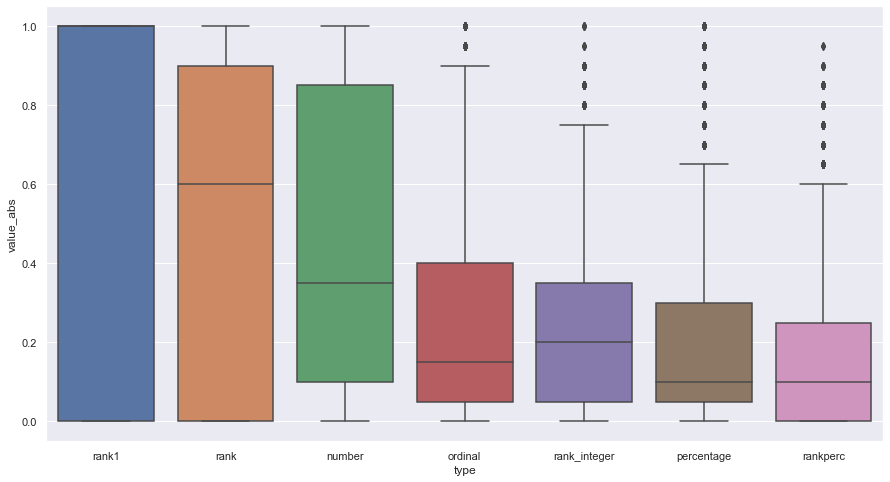

In [14]:
sns.set(rc = {'figure.figsize':(15,8)})
ax = sns.boxplot(x="type", y="value_abs", data=df, order=plot_order)

### Age
Based on the age box plot, all age groups but '10s' (teenagers) showed similar performance.
- Good: 50s, 60s, 70+
- Intermediate: 20s, 30s, 40s
- Poor: 10s


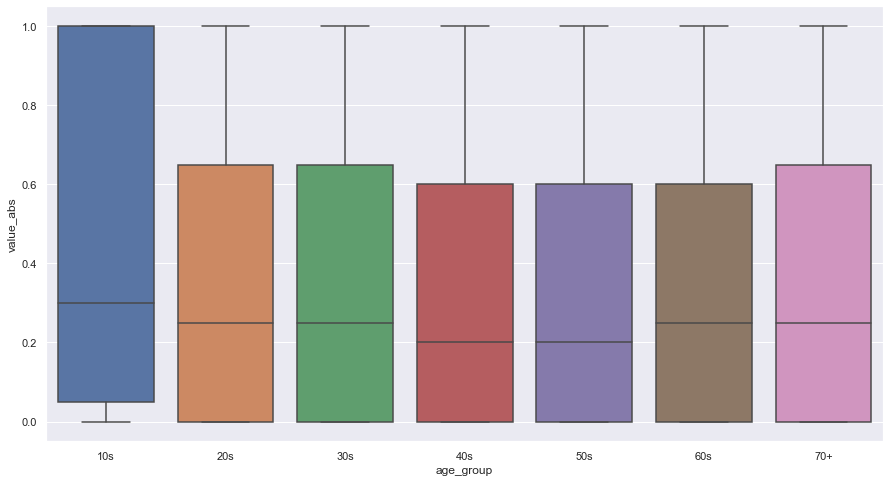

In [15]:
# by age
sns.set(rc = {'figure.figsize':(15,8)})
ax = sns.boxplot(x="age_group", y="value_abs", data=df)

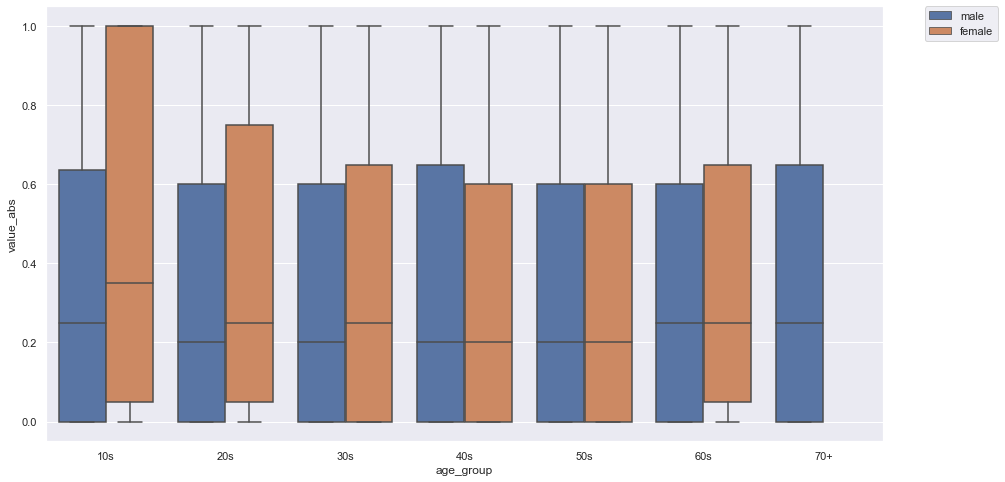

In [16]:
# by age and sex
sns.set(rc = {'figure.figsize':(15,8)})
ax = sns.boxplot(x="age_group", y="value_abs", hue='sexe',data=df)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

### Sector
The box plots of sectors show that 'livelihood', 'assistance', 'wash', and 'health' have very wide range of values. \
Especially, 'health' and 'wash' sector might be due to the high number of rank questions. \
The rest has average values lower than 0.2. 

In [22]:
plot_order = df.groupby('question_sector')['value_abs'].mean().sort_values(ascending=False).index.values

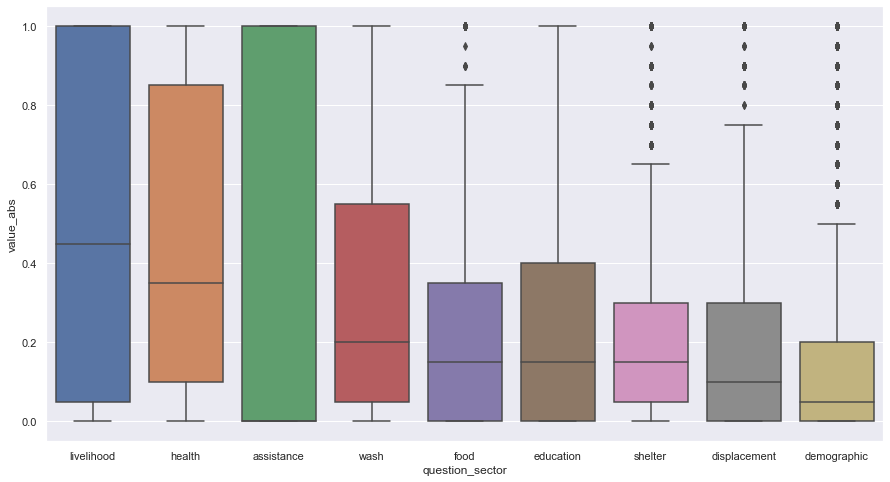

In [23]:
sns.set(rc = {'figure.figsize':(15,8)})
ax = sns.boxplot(x="question_sector", y="value_abs", data=df, order=plot_order)

### Status
Based on the status box plot, it can be categorized as:
- Good: hote, displaced
- Intermediate: migrant
- Poor: voluntary, professional

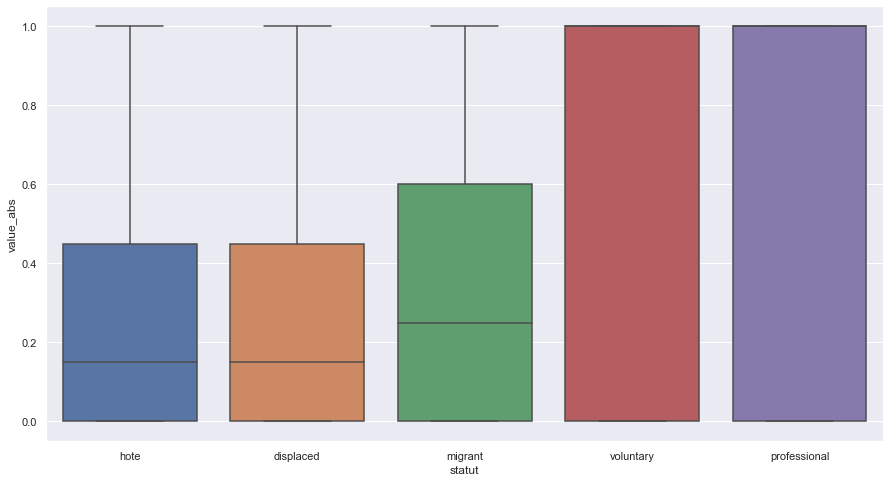

In [24]:
sns.set(rc = {'figure.figsize':(15,8)})
ax = sns.boxplot(x="statut", y="value_abs", data=df)

### Sex

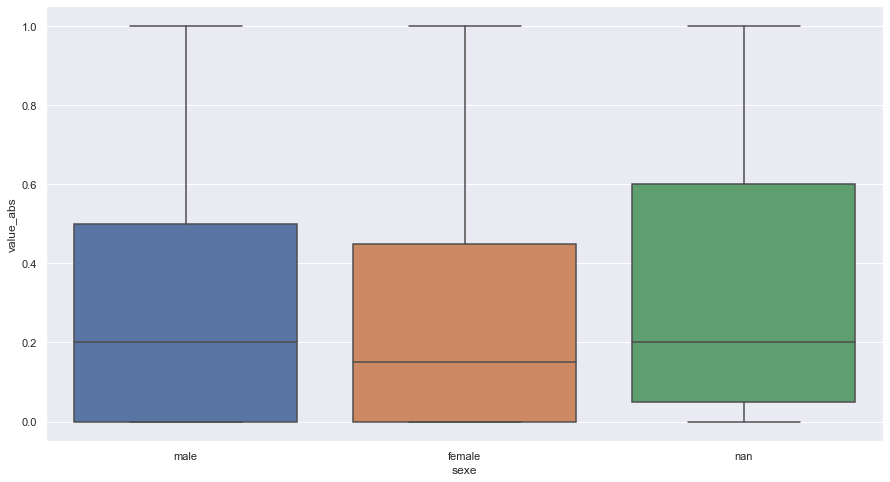

In [109]:
sns.set(rc = {'figure.figsize':(15,8)})
ax = sns.boxplot(x="sexe", y="value_abs", data=df)

## pilot

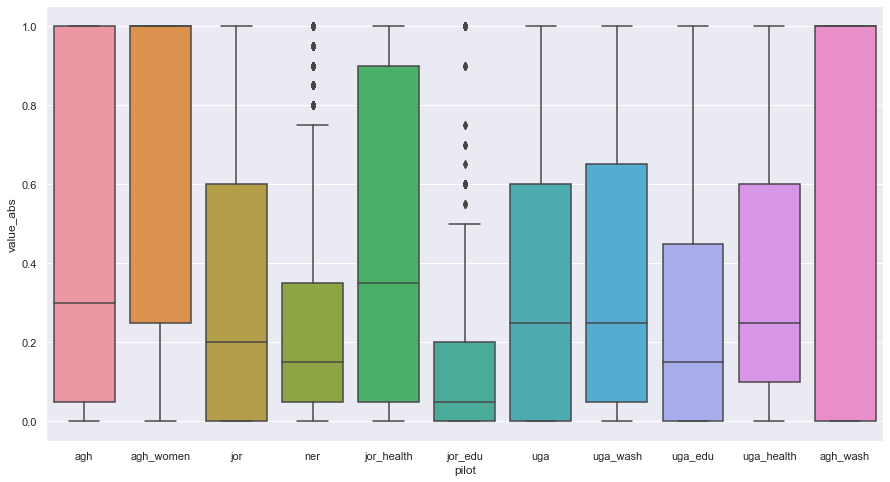

In [25]:
sns.set(rc = {'figure.figsize':(15,8)})
ax = sns.boxplot(x="pilot", y="value_abs", data=df)

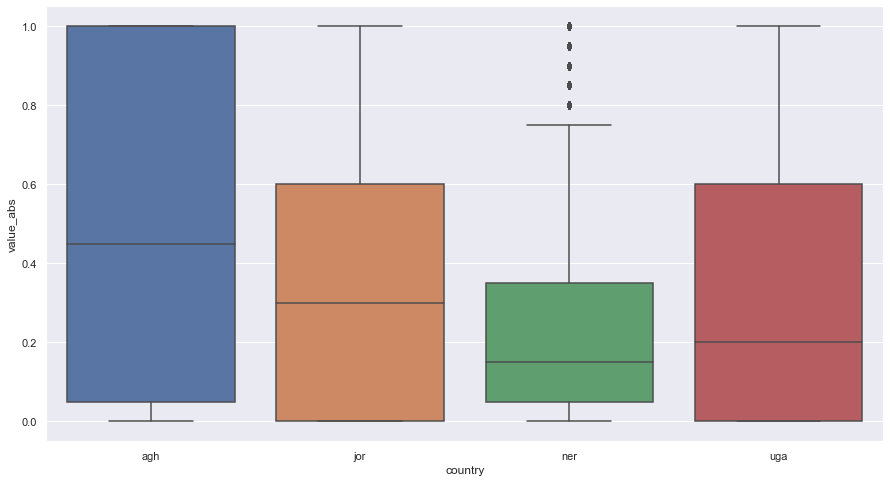

In [106]:
# Just countries
sns.set(rc = {'figure.figsize':(15,8)})
ax = sns.boxplot(x="country", y="value_abs", data=df)

## Bonus
From the visualization of the raw data, no significant characteristics was observed. In the following analysis, data without bad questions and data only with good questions were analyzed. 
- Bad question (too difficult that most KIs got wrong, mean score of the question is 1)
- God question (easy question with the average score of KIs less than 0.4)

### Data without bad questions

#### Investigating bad questions

In [27]:
# take the mean score of all KIs for each question
df.groupby(['variable'])['value_abs'].mean()

variable
adult_member_cal_//_all_//_demographic_//_number                                0.349505
adults_own_tazkira_1_3_3_//_all_//_demographic_//_number                        0.268812
apx_toilet_loc_h_1_//_host_//_wash_//_rankperc                                  0.155714
apx_toilet_loc_h_2_//_host_//_wash_//_rankperc                                  0.124286
apx_toilet_loc_r_1_//_displaced_//_wash_//_rankperc                             0.137143
                                                                                  ...   
what_proportion_returnee_3_3_._pakistan_//_all_//_displacement_//_percentage    0.040099
what_type_public_latrine_5_7_1_//_all_//_wash_//_rank1                          0.307692
who_cleans_5_8_1_//_all_//_wash_//_rank1                                        0.093023
who_provided_assist_6_2_//_all_//_assistance_//_rank1                           0.033708
women_income_10_1_//_all_//_livelihood_//_percentage                            0.118310
Name: value_

In [28]:
df_var = df.groupby('variable')['value_abs'].mean()

In [29]:
badq = df_var[df_var == 1].copy()

In [30]:
badq=badq.index.to_list()

In [31]:
print('Number of bad questions: ', len(badq))

Number of bad questions:  23


In [32]:
df_ = df[~df['variable'].isin(badq)].copy()

#### Visualization of dataset without bad questions

#### Question type

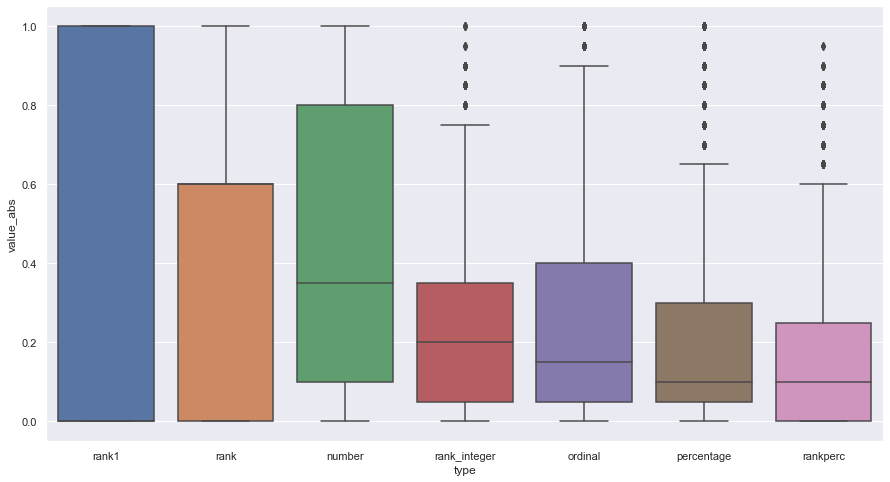

In [16]:
plot_order = df_.groupby('type')['value_abs'].mean().sort_values(ascending=False).index.values
sns.set(rc = {'figure.figsize':(15,8)})
ax = sns.boxplot(x="type", y="value_abs", data=df_, order=plot_order)

#### Question sector

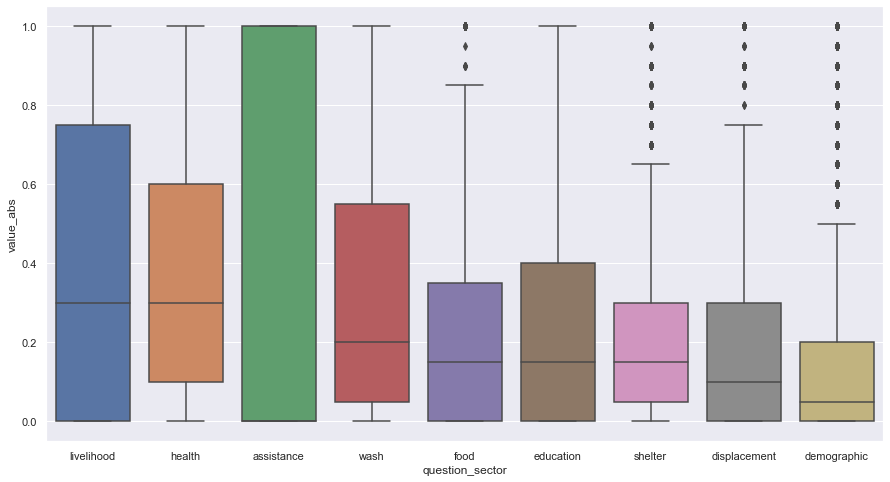

In [19]:
plot_order = df_.groupby('question_sector')['value_abs'].mean().sort_values(ascending=False).index.values

sns.set(rc = {'figure.figsize':(15,8)})
ax = sns.boxplot(x="question_sector", y="value_abs", data=df_, order=plot_order)

After removing bad questions, the difference between sectors seems better. The performance of KI could be determined based on this criteria.
- Is the KI generally good at all sectors?
- Is the KI better at a certain sector?


#### Age

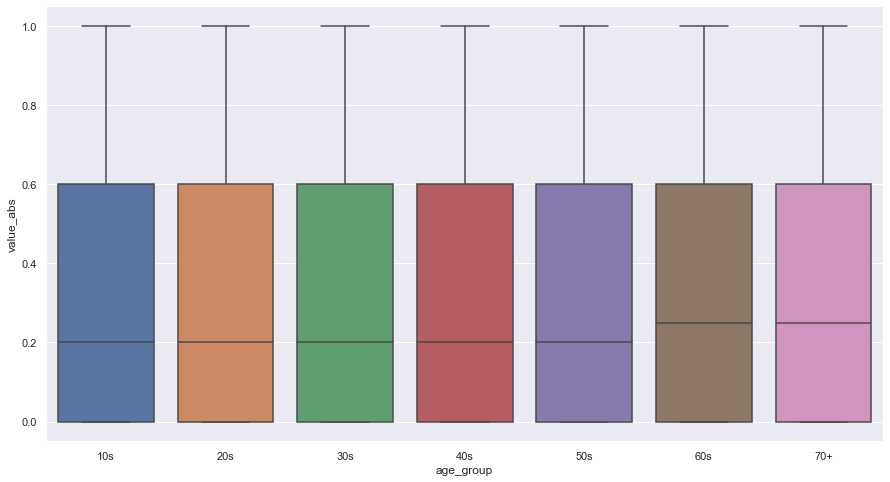

In [20]:
sns.set(rc = {'figure.figsize':(15,8)})
ax = sns.boxplot(x="age_group", y="value_abs", data=df_)

#### Age & sex

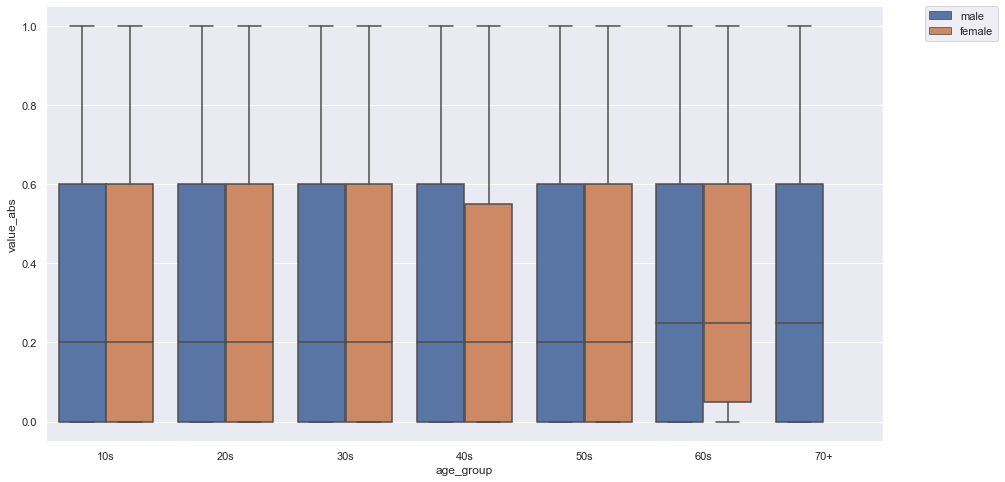

In [21]:
sns.set(rc = {'figure.figsize':(15,8)})
ax = sns.boxplot(x="age_group", y="value_abs", hue='sexe',data=df_)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

#### Status

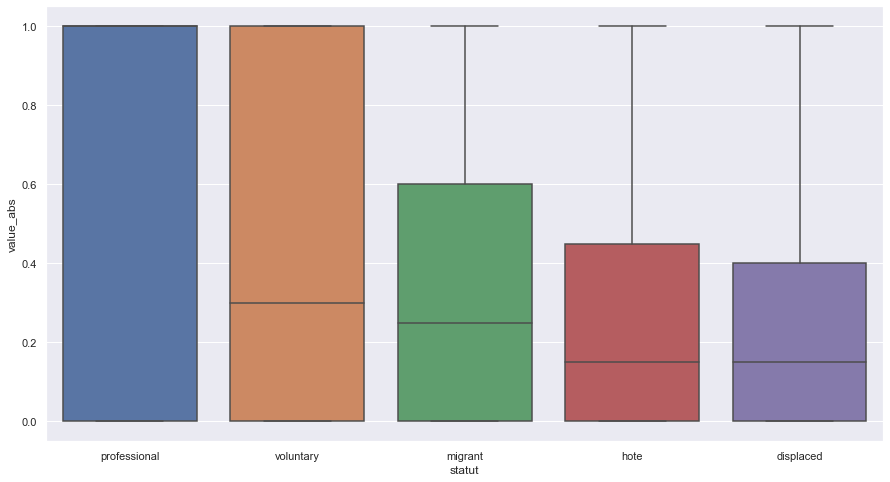

In [22]:
plot_order = df_.groupby('statut')['value_abs'].mean().sort_values(ascending=False).index.values
sns.set(rc = {'figure.figsize':(15,8)})
ax = sns.boxplot(x="statut", y="value_abs", data=df_, order=plot_order)

#### Sex

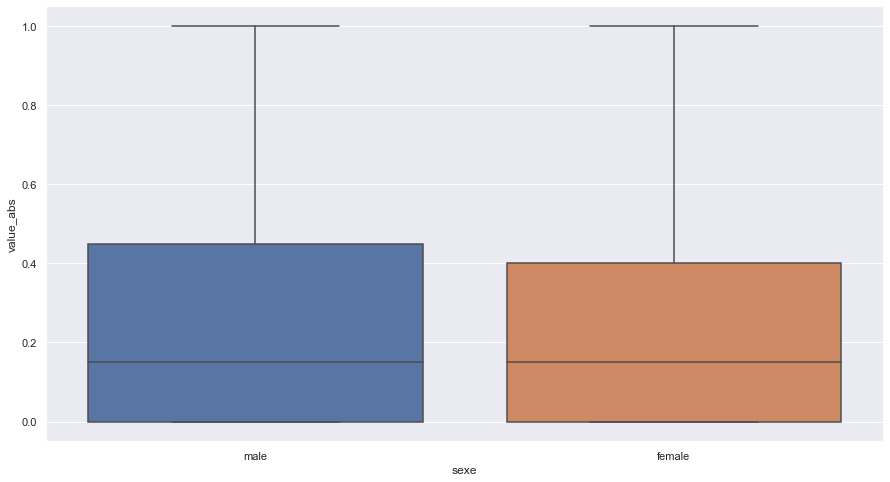

In [35]:
plot_order = df_.groupby('sexe')['value_abs'].mean().sort_values(ascending=False).index.values
sns.set(rc = {'figure.figsize':(15,8)})
ax = sns.boxplot(x="sexe", y="value_abs", data=df_, order=plot_order)

## Only good questions

### Filtering good questions

In [145]:
goodq = df_var[df_var <= 0.4].copy()    # Question mean score less than '0.4' is a randomly set value.

In [146]:
goodq = goodq.index.to_list()

In [147]:
df_g = df[df['variable'].isin(goodq)]

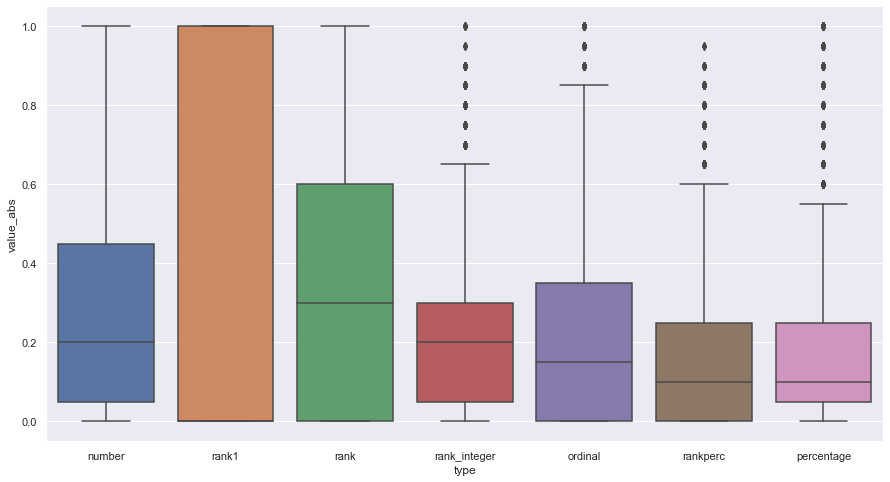

In [148]:
# Type - cleaned data
plot_order = df_g.groupby('type')['value_abs'].mean().sort_values(ascending=False).index.values
sns.set(rc = {'figure.figsize':(15,8)})
ax = sns.boxplot(x="type", y="value_abs", data=df_g, order=plot_order)

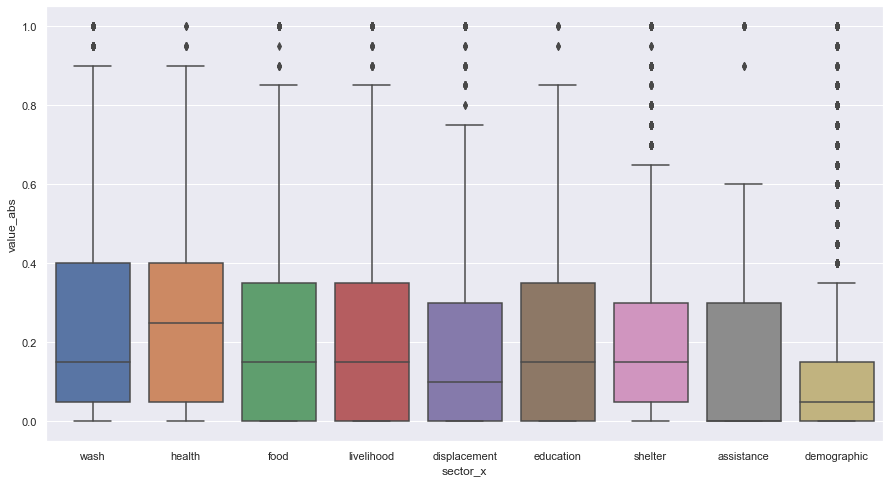

In [149]:
# Sector - cleaned data
plot_order = df_g.groupby('sector_x')['value_abs'].mean().sort_values(ascending=False).index.values

sns.set(rc = {'figure.figsize':(15,8)})
ax = sns.boxplot(x="sector_x", y="value_abs", data=df_g, order=plot_order)

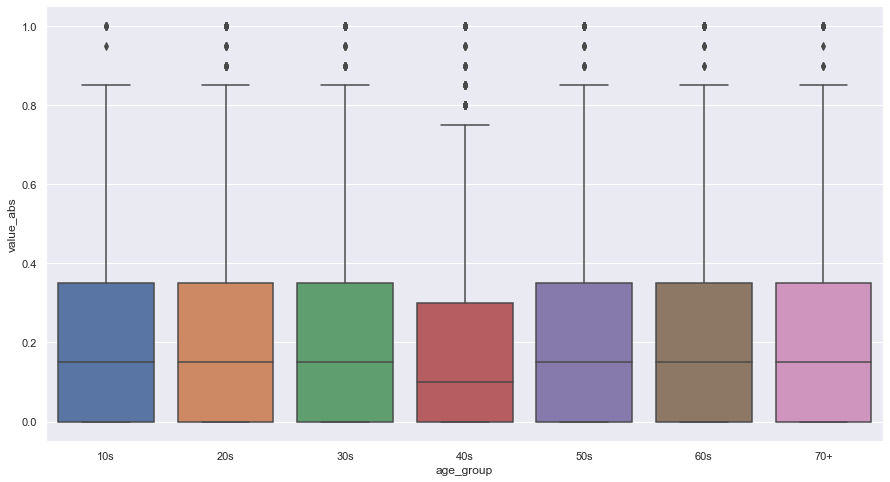

In [139]:
# Age - cleaned data
sns.set(rc = {'figure.figsize':(15,8)})
ax = sns.boxplot(x="age_group", y="value_abs", data=df_g)

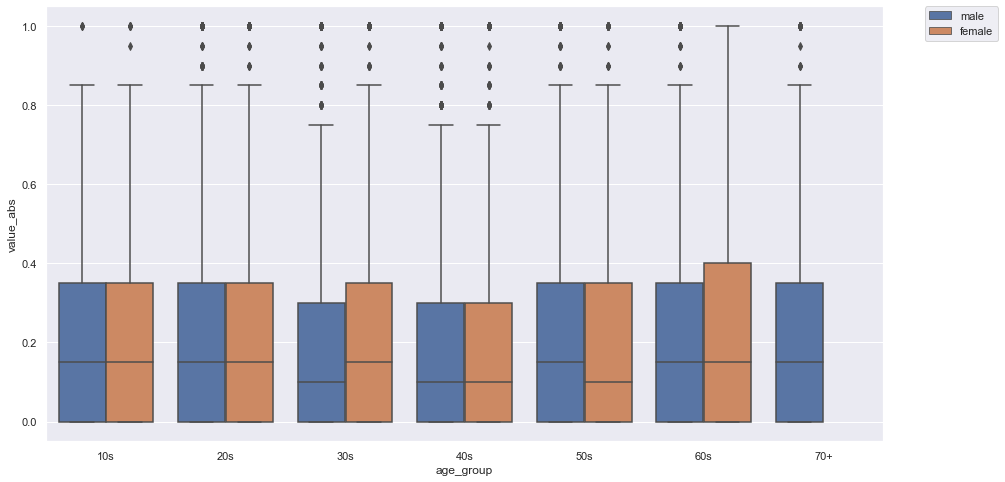

In [140]:
# Age & sex - cleaned data
sns.set(rc = {'figure.figsize':(15,8)})
ax = sns.boxplot(x="age_group", y="value_abs", hue='sexe',data=df_g)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

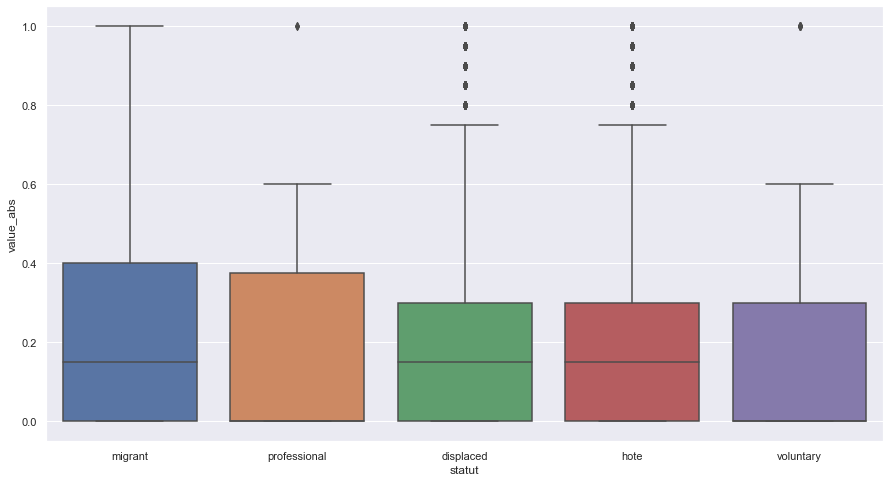

In [141]:
# Status - cleaned data
plot_order = df_g.groupby('statut')['value_abs'].mean().sort_values(ascending=False).index.values
sns.set(rc = {'figure.figsize':(15,8)})
ax = sns.boxplot(x="statut", y="value_abs", data=df_g, order=plot_order)

The difference between status got much smaller for good questions (easy questions), which can be interpreted that there are easy and difficult (e.g. information only available for the locals) exist.

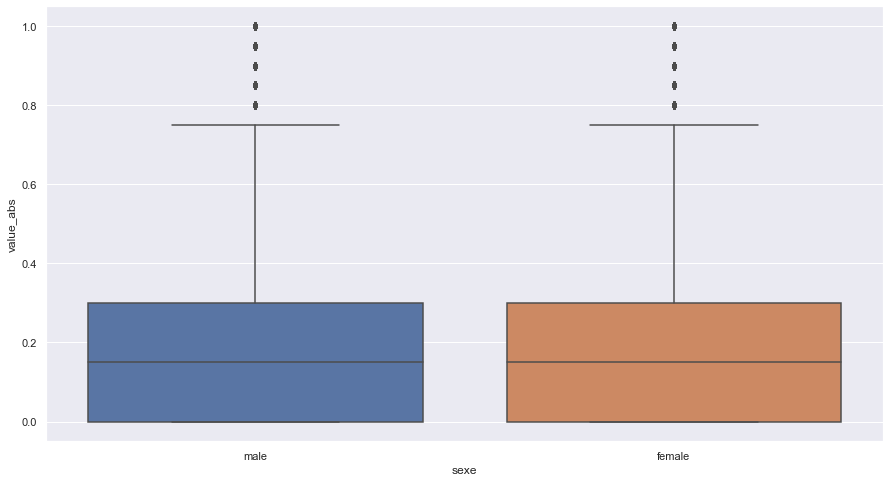

In [142]:
# Sex - cleaned data
plot_order = df_g.groupby('sexe')['value_abs'].mean().sort_values(ascending=False).index.values
sns.set(rc = {'figure.figsize':(15,8)})
ax = sns.boxplot(x="sexe", y="value_abs", data=df_g, order=plot_order)